In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_0mm = pd.read_csv("runLN-0mm-cdr3-clones-LN-study-TRB_HUMAN-after-reassignment.csv", sep="\t")
df_0mm["Analysis"] = "0mm"
df_0mm.head()

,Sample,MID,cdr3pep,freq,uniq_umis,V_sub,J_sub,sum_sites,avg_sites,read_perc,umi_perc,Analysis
0,LN02-run157-r2_S263,CTGACGCTCA,CASRELAAFNEQFFG,26,1,TRBV6-1,TRBJ2-1,24,0.923077,0.810727,0.044111,0mm
1,LN02-run157-r2_S263,CTGACGCTCA,CSVGLAGEGNEQFFG,16,1,TRBV29-1,TRBJ2-1,32,2.000000,0.498909,0.044111,0mm
2,LN02-run157-r2_S263,CTGACGCTCA,CSAWTGQNTEAFFG,9,1,TRBV29-1,TRBJ1-1,18,2.000000,0.280636,0.044111,0mm
3,LN02-run157-r2_S263,CTGACGCTCA,CSVDPSTDTQYFG,9,1,TRBV29-1,TRBJ2-3,18,2.000000,0.280636,0.044111,0mm
4,LN02-run157-r2_S263,CTGACGCTCA,CASSFG,8,1,TRBV12-4+TRBV27+TRBV5-4,"TRBJ1-1,TRBJ2-5,TRBJ1-4,TRBJ2-3",7,0.875000,0.249454,0.044111,0mm


In [3]:
df_1mm = pd.read_csv("runLN-1mm-cdr3-clones-LN-study-TRB_HUMAN-after-reassignment.csv", sep="\t")
df_1mm["Analysis"] = "1mm"
df_1mm.head()

,Sample,MID,cdr3pep,freq,uniq_umis,V_sub,J_sub,sum_sites,avg_sites,read_perc,umi_perc,Analysis
0,LN02-run157-r2_S263,CTGACGCTCA,CASRELAAFNEQFFG,26,1,TRBV6-1,TRBJ2-1,24,0.923077,0.785498,0.042535,1mm
1,LN02-run157-r2_S263,CTGACGCTCA,CSVGLAGEGNEQFFG,16,1,TRBV29-1,TRBJ2-1,32,2.000000,0.483384,0.042535,1mm
2,LN02-run157-r2_S263,CTGACGCTCA,CSAWTGQNTEAFFG,9,1,TRBV29-1,TRBJ1-1,18,2.000000,0.271903,0.042535,1mm
3,LN02-run157-r2_S263,CTGACGCTCA,CSVDPSTDTQYFG,9,1,TRBV29-1,TRBJ2-3,18,2.000000,0.271903,0.042535,1mm
4,LN02-run157-r2_S263,CTGACGCTCA,CASSFG,8,1,TRBV12-4+TRBV27+TRBV5-4,"TRBJ1-1,TRBJ2-5,TRBJ1-4,TRBJ2-3",7,0.875000,0.241692,0.042535,1mm


In [4]:
len(df_0mm)

120440

In [5]:
len(df_1mm)

125064

In [6]:
samples = list(df_0mm["Sample"].unique())
ten_samples = samples[:10]
ten_samples

['LN02-run157-r2_S263',
 'LN02-run162-r2_S316',
 'LN03-run157-r2_S264',
 'LN03-run162-r2_S318',
 'LN07-run157-r2_S268',
 'LN07-run162-r2_S323',
 'LN09-run157-r2_S270',
 'LN09-run162-r2_S326',
 'LN13-run157-r2_S274',
 'LN13-run162-r2_S333']

## Compare samples: analysis 0mm vs 1mm

In [7]:
def makeScatter(x,y,s):
    # Determine lowest and hihest number for the x and y lim
    hec_threshold = 0.5
    the_minimum = min(min(x), min(y), hec_threshold)
    the_maximum = max(max(x), max(y), hec_threshold)
    print(s, "min max:", the_minimum, the_maximum)
    # make min a bit lower and maximum a bit higher, so you do not miss any datapoints in figure
    the_minimum = the_minimum * 0.9
    the_maximum = the_maximum * 1.1
    
    fig = plt.figure()
    ax = plt.gca()
    ax.scatter(x, y, c='blue', alpha=0.5, edgecolors='none')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([the_minimum,the_maximum])
    ax.set_ylim([the_minimum,the_maximum])
    ax.set_xlabel("read_perc, 0mm")
    ax.set_ylabel("read_perc, 1mm")
    
    # Add red dotted lines at 0.5%
    ax.plot([hec_threshold, hec_threshold], [the_minimum, the_maximum], c='r', linestyle=":")
    ax.plot([the_minimum, the_maximum], [hec_threshold, hec_threshold], c='r', linestyle=":")
    
    plt.title(s)
    fig.show()

## Using V, J, CDR3peptide as a definition for a clone

LN02-run157-r2_S263 min max: 0.030211480362499998 0.810726535703
LN02-run162-r2_S316 min max: 0.0493827160494 0.659898477157
LN03-run157-r2_S264 min max: 0.023116042533499997 0.5
LN03-run162-r2_S318 min max: 0.09319664492080001 0.5
LN07-run157-r2_S268 min max: 0.0359066427289 0.709219858156


/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


LN07-run162-r2_S323 min max: 0.04805382027869999 1.30653266332
LN09-run157-r2_S270 min max: 0.029629629629599998 6.7354368932
LN09-run162-r2_S326 min max: 0.0488997555012 6.970912738210001
LN13-run157-r2_S274 min max: 0.031181789834699998 0.611719253059
LN13-run162-r2_S333 min max: 0.0445235975067 0.550711335475
LN14-run157-r2_S275 min max: 0.037608123354599995 0.5
LN14-run162-r2_S335 min max: 0.0434782608696 0.5
LN16-run157-r2_S277 min max: 0.035174111853699994 0.580340950308
LN16-run162-r2_S339 min max: 0.040700040699999995 0.5033557046980001
LN18-run157-r2_S278 min max: 0.035100035099999996 0.6985294117649999
LN18-run162-r2_S343 min max: 0.0394788787998 0.782214903252
LN20-run157-r2_S280 min max: 0.032247662044500004 3.07589434972
LN20-run162-r2_S348 min max: 0.0374812593703 3.2158078264200003
LN24-run157-r2_S284 min max: 0.036231884058 0.6779661016949999
LN24-run162-r2_S354 min max: 0.04591368227730001 0.617870722433
LN25-run157-r2_S285 min max: 0.0328731097962 0.5
LN25-run162-r2_S

/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


LN30-run157-r2_S289 min max: 0.041476565740400005 1.58254918734
LN30-run162-r2_S361 min max: 0.0389559797429 1.886035313
LN34-run157-r1_S246 min max: 0.047103155911400005 7.094266277939999
LN35-run157-r2_S290 min max: 0.0339789330615 1.37323943662
LN35-run162-r2_S363 min max: 0.0409165302782 1.9433882551800001
LN36-run157-r1_S247 min max: 0.05094243504840001 13.567312729200001
LN38-run157-r1_S239 min max: 0.044923629829299996 2.6390197926499996
LN39-run157-r1_S240 min max: 0.046232085066999995 0.880195599022
LN40-run157-r1_S241 min max: 0.033613445378200005 15.0647580095
LN41-run157-r2_S265 min max: 0.0526038926881 0.937155457552
LN41-run162-r2_S320 min max: 0.050530570995500006 1.5271195365999999
LN42-run157-r1_S242 min max: 0.0407996736026 1.4261019878999999
LN43-run157-r2_S266 min max: 0.0359324469996 0.610851598994
LN43-run162-r2_S321 min max: 0.0435729847495 0.653594771242
LN44-run157-r1_S243 min max: 0.0606060606061 11.314984709500001
LN45-run157-r1_S244 min max: 0.0350754121361 

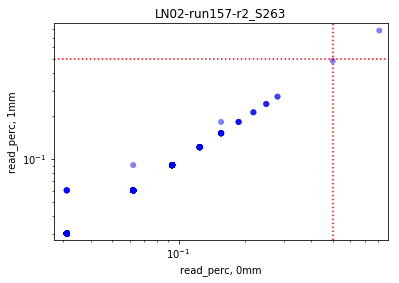

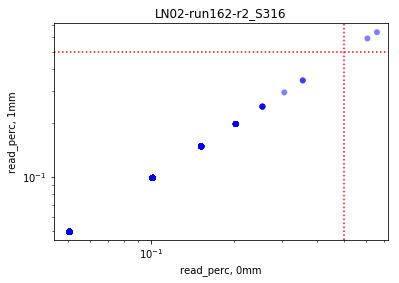

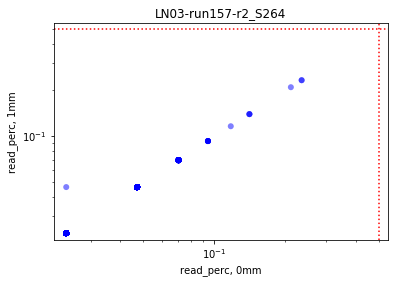

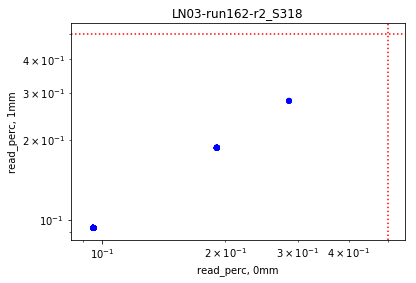

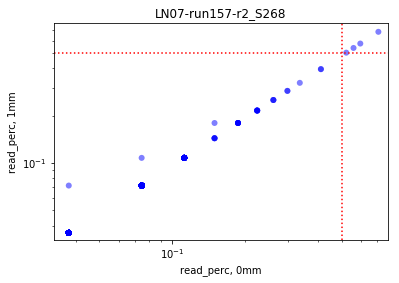

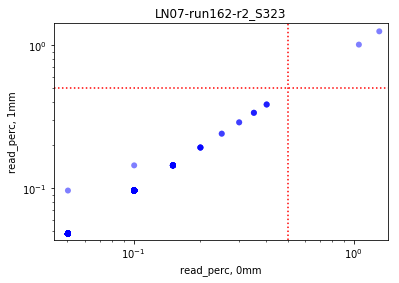

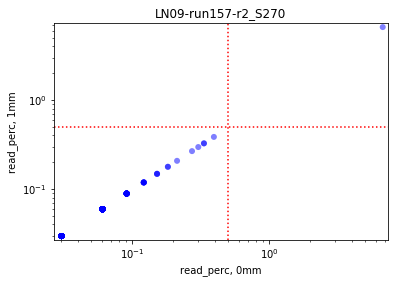

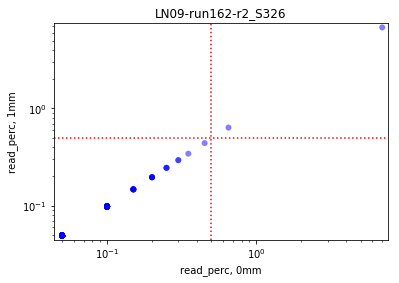

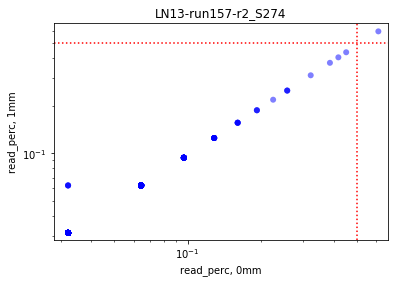

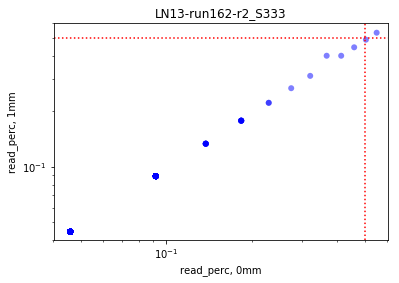

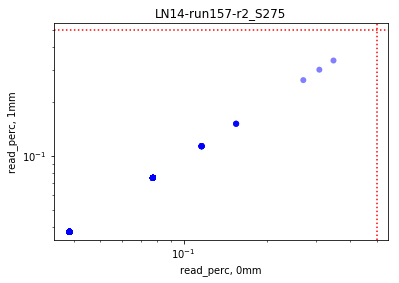

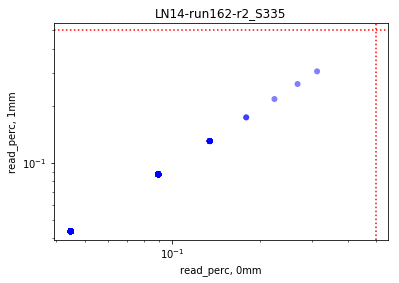

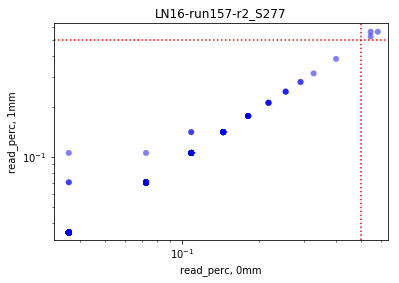

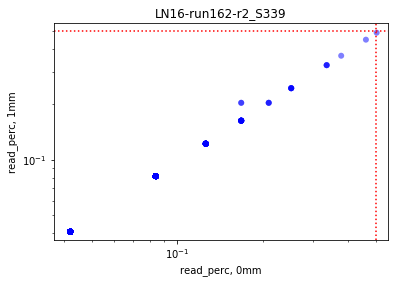

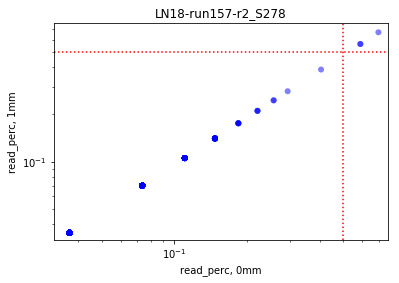

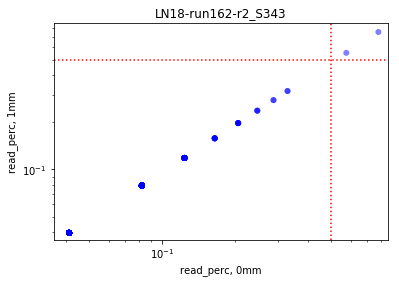

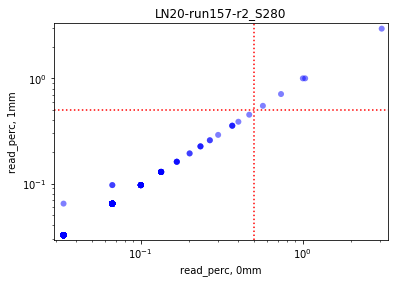

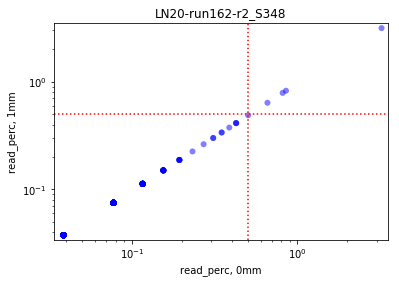

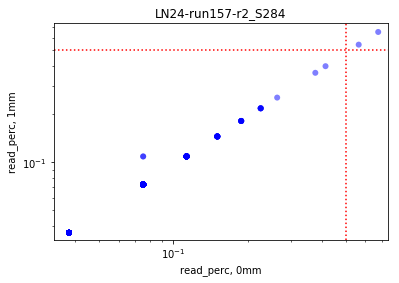

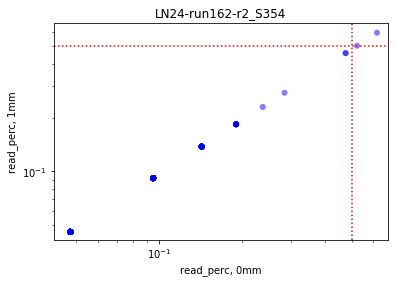

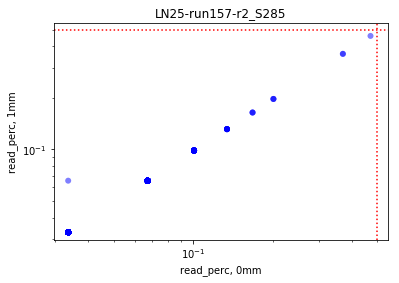

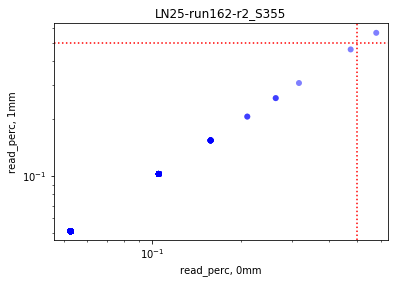

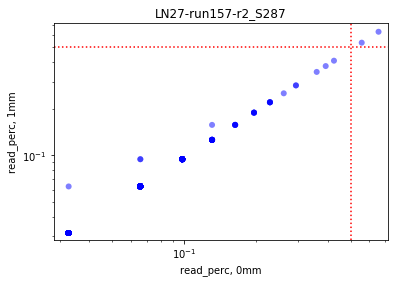

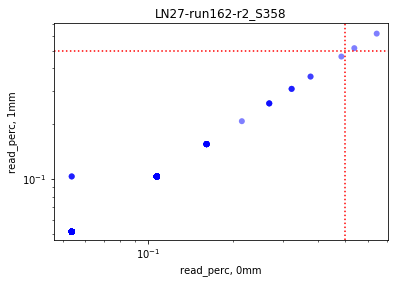

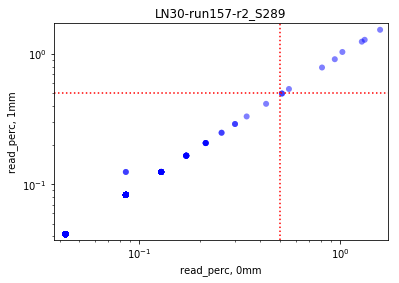

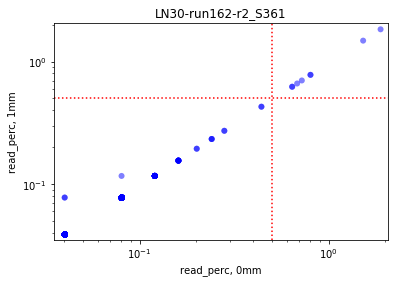

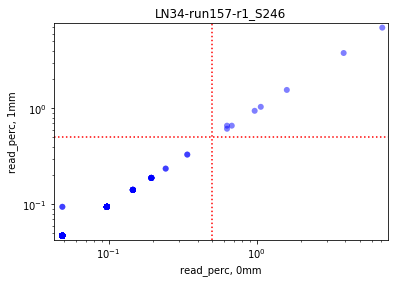

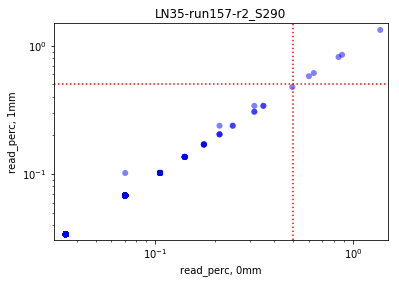

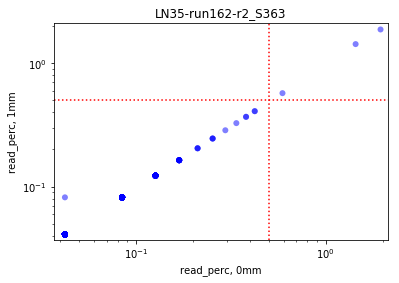

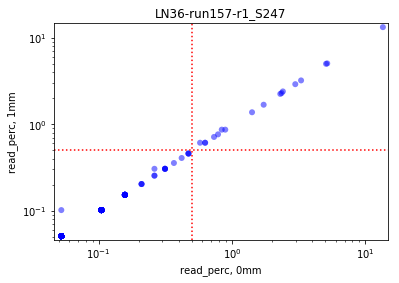

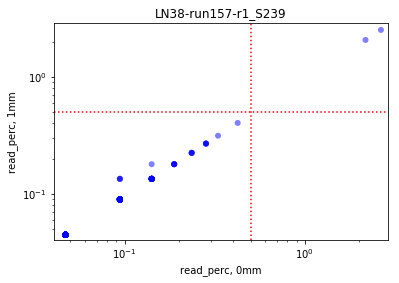

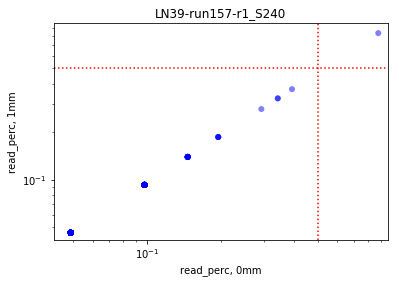

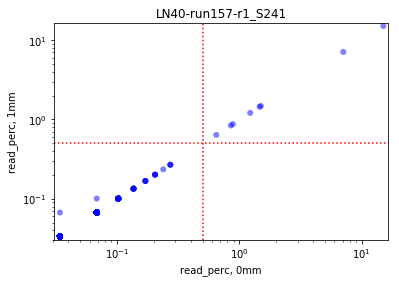

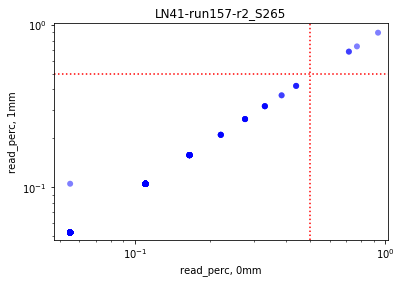

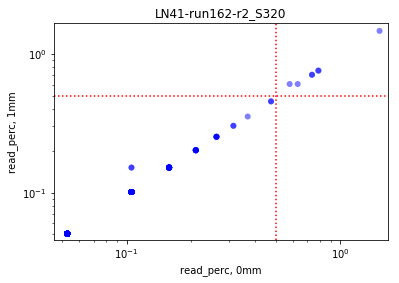

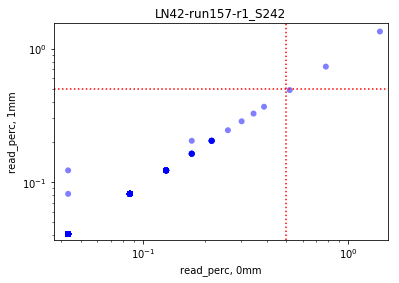

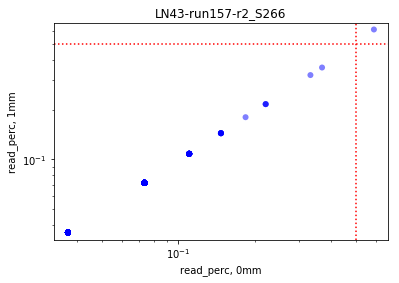

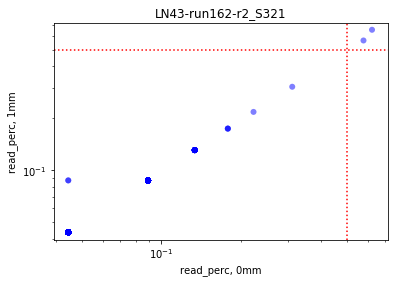

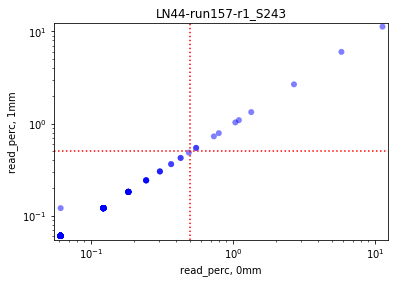

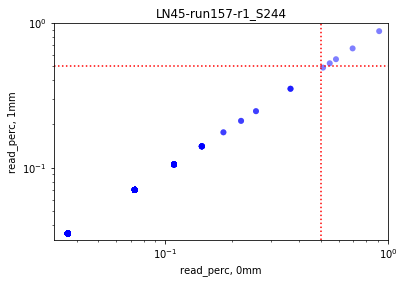

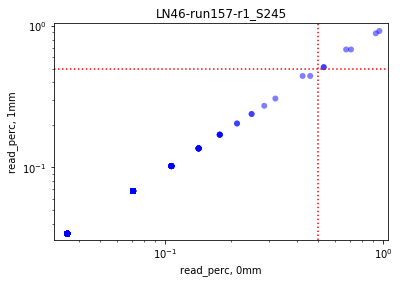

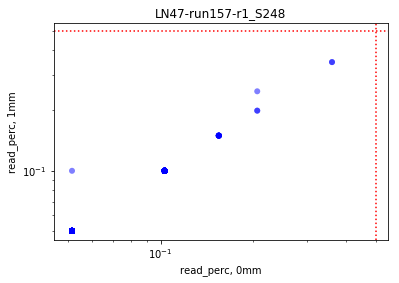

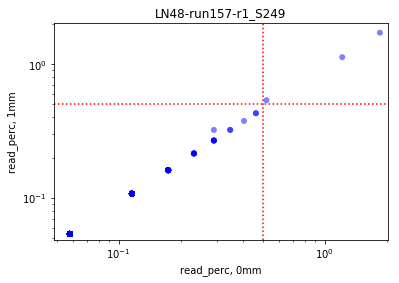

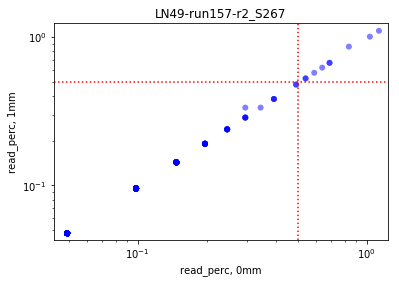

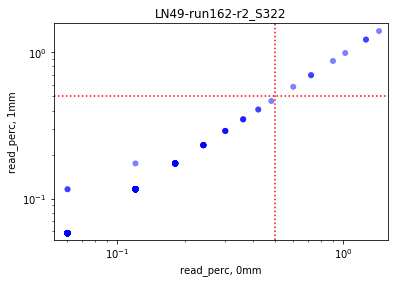

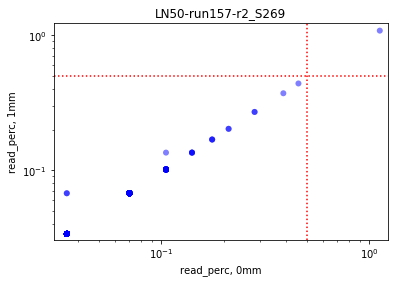

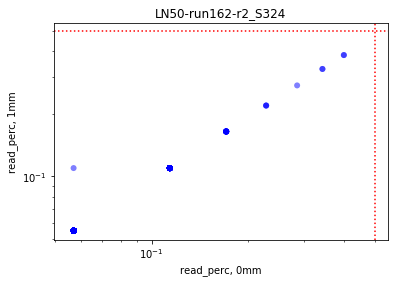

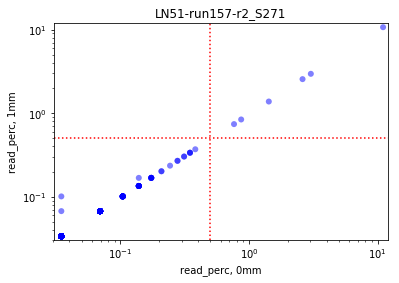

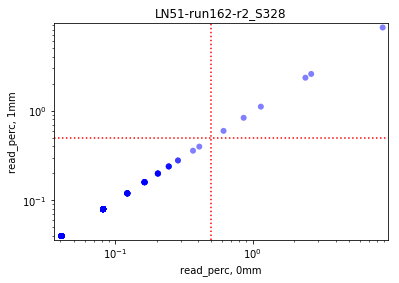

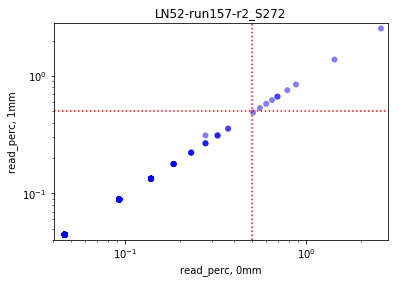

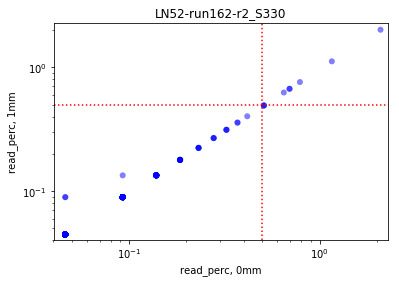

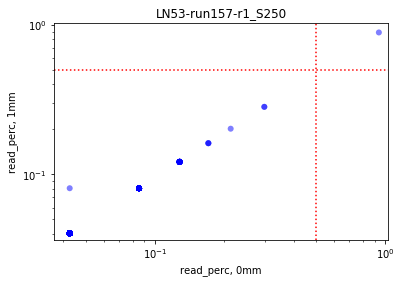

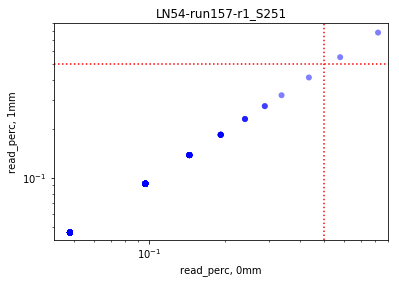

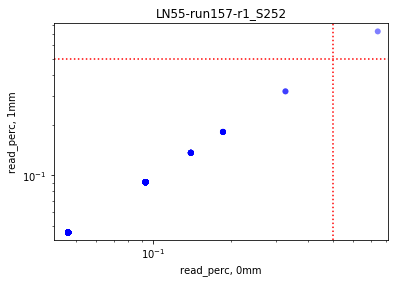

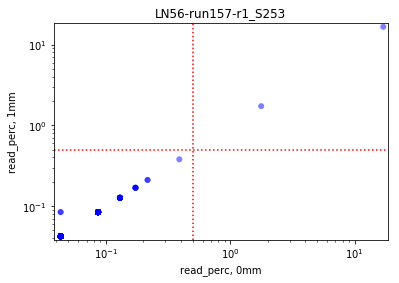

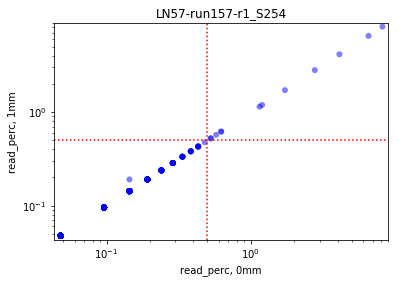

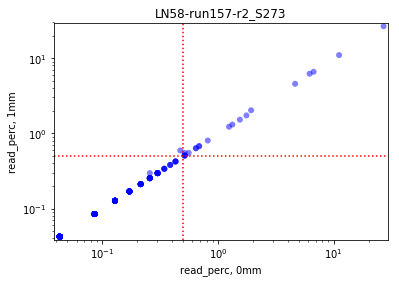

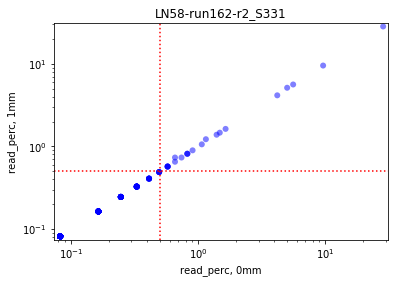

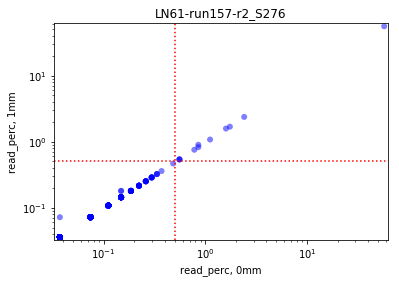

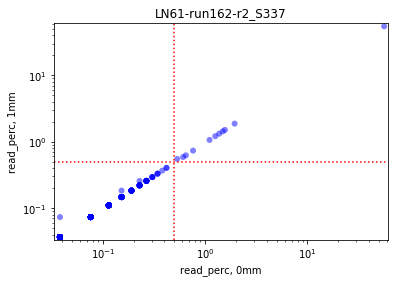

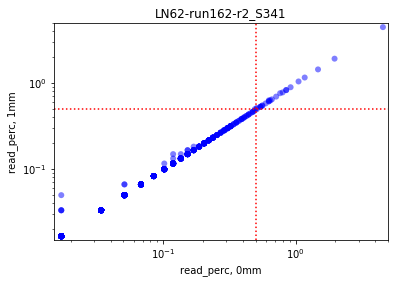

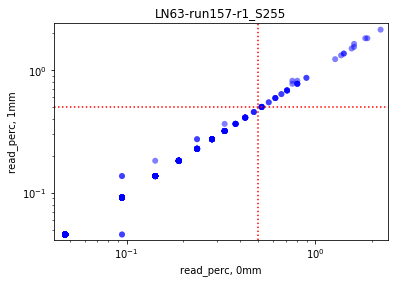

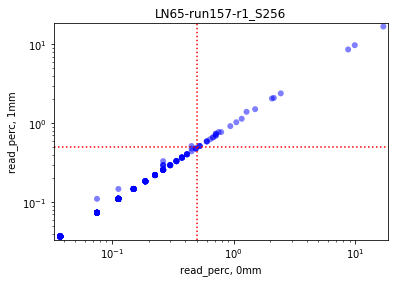

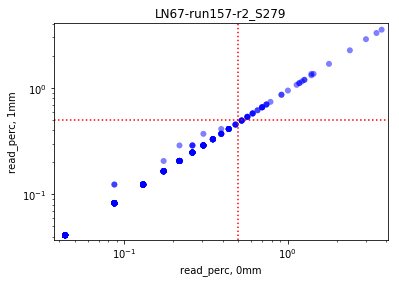

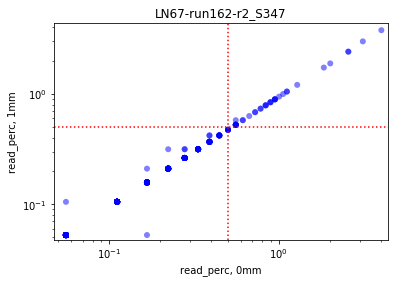

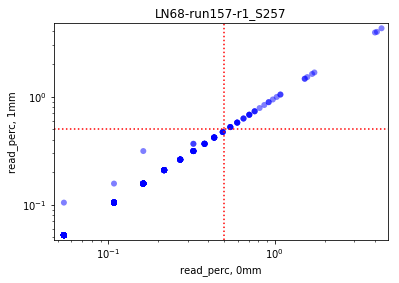

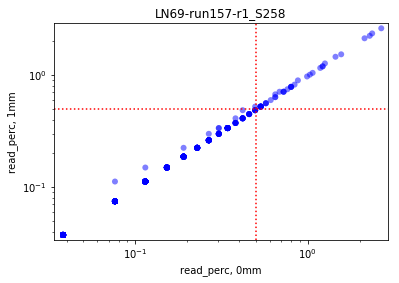

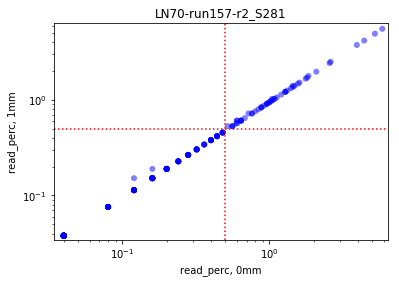

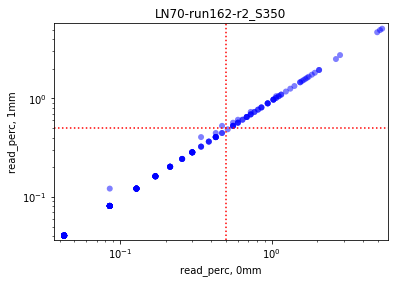

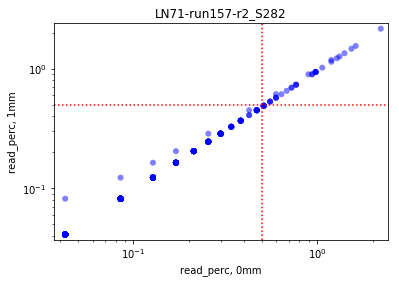

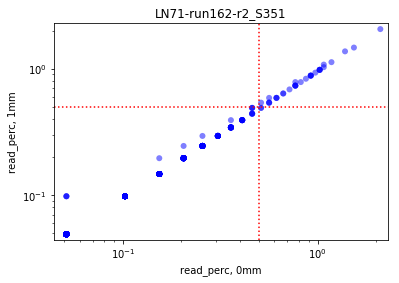

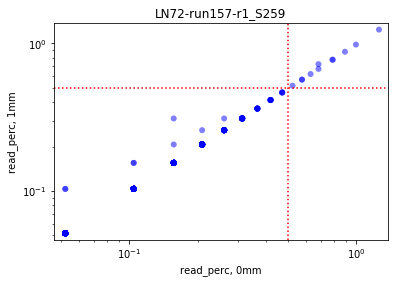

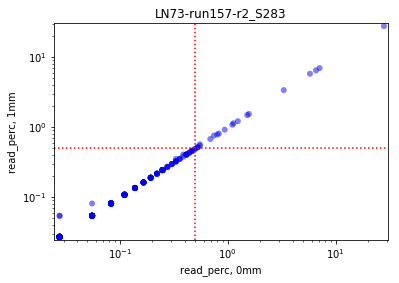

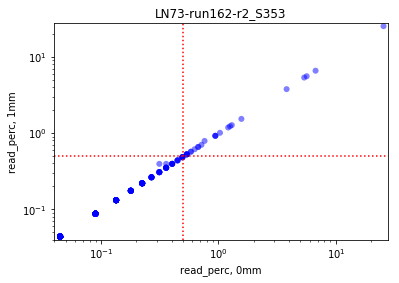

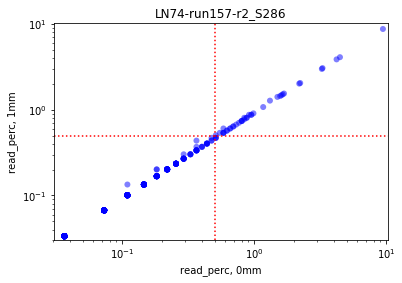

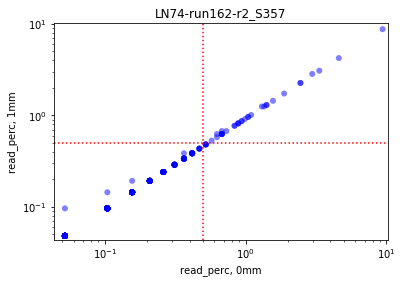

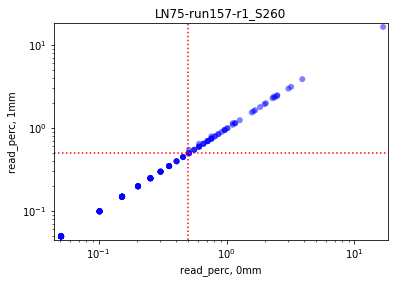

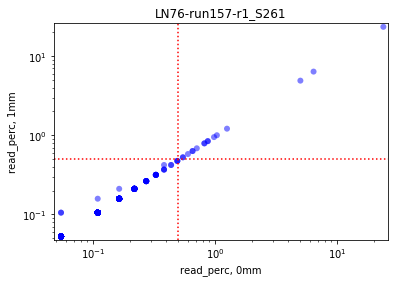

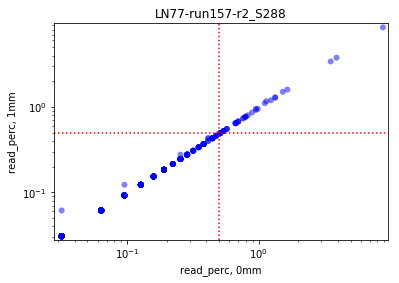

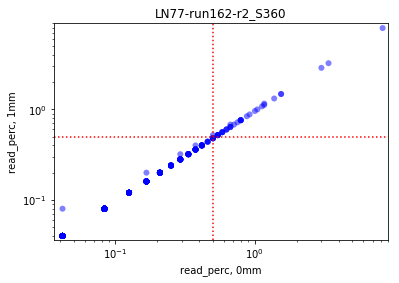

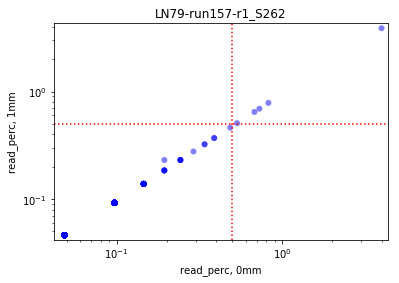

In [8]:
for s in samples:
    df_x = df_0mm[df_0mm["Sample"] == s]
    df_y = df_1mm[df_1mm["Sample"] == s]
    df_xy = pd.merge(df_x, df_y, how="outer", left_on=['V_sub', 'J_sub', 'cdr3pep'], right_on=['V_sub', 'J_sub', 'cdr3pep'])
    df_xy['read_perc_x'].fillna(0.5/sum(df_xy['freq_x']))
    df_xy['read_perc_y'].fillna(0.5/sum(df_xy['freq_y']))
    makeScatter(df_xy['read_perc_x'], df_xy['read_perc_y'], s)

## Count number of HECs / dominant clones

In [9]:
hec_threshold = 0.5
df_0mm_hecs = df_0mm[df_0mm['read_perc'] > hec_threshold]
df_0mm_nr_hecs = df_0mm_hecs.groupby('Sample').agg({'Analysis': len})
df_1mm_hecs = df_1mm[df_1mm['read_perc'] > hec_threshold]
df_1mm_nr_hecs = df_1mm_hecs.groupby('Sample').agg({'Analysis': len})
df_nr_hecs = pd.merge(df_0mm_nr_hecs, df_1mm_nr_hecs, how='outer', left_index=True, right_index=True)
df_nr_hecs = df_nr_hecs.reset_index()
df_nr_hecs["Difference"] = df_nr_hecs["Analysis_y"] - df_nr_hecs["Analysis_x"]

df_nr_hecs

,Sample,Analysis_x,Analysis_y,Difference
0,LN02-run157-r2_S263,1,1.0,0.0
1,LN02-run162-r2_S316,2,2.0,0.0
2,LN07-run157-r2_S268,4,5.0,1.0
3,LN07-run162-r2_S323,2,2.0,0.0
4,LN09-run157-r2_S270,1,1.0,0.0
5,LN09-run162-r2_S326,2,2.0,0.0
6,LN13-run157-r2_S274,1,1.0,0.0
7,LN13-run162-r2_S333,2,1.0,-1.0
8,LN16-run157-r2_S277,3,3.0,0.0
9,LN16-run162-r2_S339,1,NaN,NaN


/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


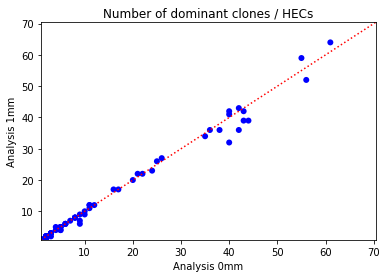

In [10]:
the_minimum = min(min(df_nr_hecs['Analysis_x']), min(df_nr_hecs['Analysis_y'])) * 0.9
the_maximum = max(max(df_nr_hecs['Analysis_x']), max(df_nr_hecs['Analysis_y'])) * 1.1
fig = plt.figure()
ax = plt.gca()
ax.scatter(df_nr_hecs['Analysis_x'], df_nr_hecs['Analysis_y'], c='blue', edgecolors='none')
ax.set_xlim([the_minimum, the_maximum])
ax.set_ylim([the_minimum, the_maximum])
ax.set_xlabel("Analysis 0mm")
ax.set_ylabel("Analysis 1mm")
ax.plot([the_minimum, the_maximum], [the_minimum, the_maximum], c='r', linestyle=":")
plt.title('Number of dominant clones / HECs')
fig.show()

In [11]:
outfile = "runLN-LNstudy-TCRb-0mm-1mm-hecs.csv"
df_nr_hecs.to_csv(outfile)
print("Wrote", outfile, "to disk")

Wrote runLN-LNstudy-TCRb-0mm-1mm-hecs.csv to disk
